### Do your imports!

In [249]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', 30)

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [407]:
# I'm limiting to 100,000 random rows!!!


df = pd.read_csv('subset.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.sample(100000)


In [408]:
#creating an alternative df with all the values (instead of having only 100,000)
# this doesnt work and my computer freezes, but i will keep it here anyway as a commentary
#full_df = pd.read_csv('subset.csv')
#full_df.columns = full_df.columns.str.lower().str.replace(' ', '_')

### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [405]:
df.head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
5306473,46199076,05/14/2020 04:45:23 PM,05/14/2020 05:11:32 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,NaN,10461.0,1358 BALCOM AVENUE,NaN,BRONX,Closed,BRONX,PHONE
26146102,40311346,09/18/2018 09:16:01 AM,09/20/2018 01:35:32 PM,DOT,Department of Transportation,Street Sign - Missing,Other/Unknown,Street,11694,106-40 ROCKAWAY BEACH BOULEVARD,ADDRESS,ROCKAWAY PARK,Closed,QUEENS,MOBILE
8878043,21109128,08/25/2011 07:20:14 PM,08/26/2011 07:23:54 PM,NYCEM,NYC Emergency Management,OEM Literature Request,Hurricane Preparedness - English,NaN,NaN,NaN,NaN,NaN,Closed,Unspecified,PHONE
10125831,51753806,09/04/2021 05:52:26 PM,09/07/2021 10:37:43 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Amusement Ride,Business,10306.0,441 CLARKE AVENUE,NaN,STATEN ISLAND,Closed,STATEN ISLAND,ONLINE
11435289,50579313,05/16/2021 04:12:11 AM,05/16/2021 05:16:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10457.0,4029 PARK AVENUE,NaN,BRONX,Closed,BRONX,PHONE
4533778,26546548,10/23/2013 12:00:00 AM,10/29/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10040.0,11 HILLSIDE AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
17535237,29066108,10/14/2014 09:07:00 AM,10/15/2014 12:00:00 PM,DSNY,Queens West 02,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11377,NaN,INTERSECTION,Woodside,Closed,QUEENS,PHONE
20611277,33024551,03/30/2016 12:00:00 PM,03/30/2016 12:00:00 PM,DOT,Department of Transportation,Street Light Condition,Lamppost Wire Exposed,NaN,11203,NaN,INTERSECTION,BROOKLYN,Closed,BROOKLYN,UNKNOWN
22588490,35586132,02/27/2017 10:24:46 AM,03/10/2017 08:31:13 AM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,11213,37 KINGSTON AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
2761443,21756861,10/27/2011 07:01:18 PM,11/04/2011 12:22:00 PM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11235,2953 SHORE PARKWAY,ADDRESS,BROOKLYN,Closed,BROOKLYN,OTHER


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [ ]:
#done

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [415]:
#converting created and closed date
df['created_date'] = pd.to_datetime(df.created_date, errors='coerce')
df['closed_date'] = pd.to_datetime(df.closed_date, errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 8647689 to 20786103
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   unique_key              100000 non-null  int64         
 1   created_date            100000 non-null  datetime64[ns]
 2   closed_date             97152 non-null   datetime64[ns]
 3   agency                  100000 non-null  object        
 4   agency_name             100000 non-null  object        
 5   complaint_type          100000 non-null  object        
 6   descriptor              98454 non-null   object        
 7   location_type           75924 non-null   object        
 8   incident_zip            94711 non-null   object        
 9   incident_address        83449 non-null   object        
 10  address_type            84325 non-null   object        
 11  city                    93743 non-null   object        
 12  status                

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [370]:
df['month'] = df.created_date.dt.strftime('%B')

df.month.value_counts().head(1)

June    9117
Name: month, dtype: int64

<AxesSubplot:xlabel='created_date'>

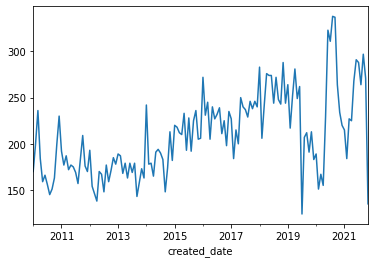

In [22]:
#plot by month and year
df.resample('M', on='created_date').size().plot(kind='line',x='index',y='values')

# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [80]:
df.resample('M', on='created_date').size().sort_values(ascending=False)



# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

created_date
2020-08-31    354
2020-06-30    324
2020-07-31    306
2021-09-30    302
2018-10-31    300
             ... 
2012-02-29    145
2012-09-30    145
2013-04-30    143
2021-11-30    133
2013-09-30    127
Length: 143, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

<AxesSubplot:xlabel='created_date'>

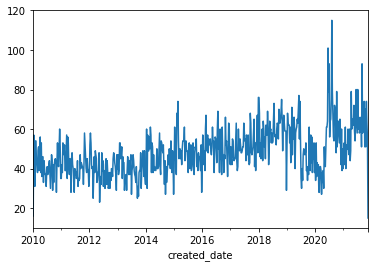

In [160]:
# dt counts only for one specific year (from month 1 to 12 or from 1 to 52 weeks), while resample counts for every year

df.resample('W', on='created_date').size().plot(ylim=(10))

# there are two big techniques for date stuff: .dt or .resample

# if you use one of those, explain why you picked that one and not the other

## What time of day (by hour) is the least common for 311 complains? The most common?


In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [166]:
# least common
# we want only 24 hours in day and not each hour for every day in 10 years, so we use DT
df['hour'] = df.created_date.dt.strftime('%H')
df.hour.value_counts(ascending=True)

04     218
05     239
03     284
06     393
02     405
01     608
07     699
20    1052
18    1054
19    1074
21    1130
17    1142
08    1154
23    1159
22    1163
16    1430
15    1505
09    1566
14    1653
13    1687
10    1757
11    1822
12    1895
00    4911
Name: hour, dtype: int64

In [167]:
# this is probably wrong and there's possibly multiple wrong time registrations at 00:00:00
# most common
# we want only 24 hours in day and not each hour for every day in 10 years, so we use DT
df['hour'] = df.created_date.dt.strftime('%H')
df.hour.value_counts(ascending=False)

00    4911
12    1895
11    1822
10    1757
13    1687
14    1653
09    1566
15    1505
16    1430
22    1163
23    1159
08    1154
17    1142
21    1130
19    1074
18    1054
20    1052
07     699
01     608
02     405
06     393
03     284
05     239
04     218
Name: hour, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'311 complaints per hour of the day'}>

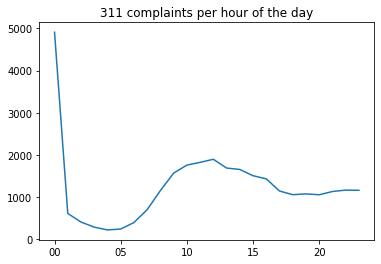

In [185]:
df.hour.value_counts().sort_index().plot(title='311 complaints per hour of the day')


# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [186]:
df.agency.value_counts(ascending=False)

NYPD                                       8471
HPD                                        7581
DOT                                        3787
DSNY                                       2423
DEP                                        2278
DOB                                        1543
DPR                                        1306
DOHMH                                       756
DOF                                         551
TLC                                         331
DHS                                         274
DCA                                         269
HRA                                         126
DFTA                                        112
MAYORâS OFFICE OF SPECIAL ENFORCEMENT      67
EDC                                          48
DOE                                          26
3-1-1                                        25
NYCEM                                         9
DOITT                                         8
ACS                                     

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [ ]:
# New York Police Departments, Housing Preservation & Development, 
# Department of Transportation, Department of Sanitation, Department of Environmental Protection

## What is the most common complaint to HPD?

In [2]:
# Why did you pick these columns to calculate the answer?

In [189]:
# i've used this dataset for reporting 1 and there's a lot of problems with the complaint descriptions, 
# so I used complaint type because at least there is some pattern there and a broad view of the problem

df[df.agency == 'HPD'].complaint_type.value_counts(ascending=False)

HEAT/HOT WATER            1722
HEATING                   1000
PLUMBING                   860
UNSANITARY CONDITION       591
GENERAL CONSTRUCTION       564
PAINT/PLASTER              489
PAINT - PLASTER            429
ELECTRIC                   391
DOOR/WINDOW                296
NONCONST                   290
WATER LEAK                 262
GENERAL                    186
FLOORING/STAIRS            167
APPLIANCE                  149
SAFETY                      85
HPD Literature Request      68
ELEVATOR                    13
OUTSIDE BUILDING            10
CONSTRUCTION                 5
Unsanitary Condition         4
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [196]:
df.groupby('agency')['complaint_type'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3) \
    .to_frame()

complaint_type
agency                                  complaint_type                                           
3-1-1                                   Noise Survey                                           22
                                        OEM Disabled Vehicle                                    2
                                        City Vehicle Placard Complaint                          1
ACS                                     Forms                                                   5
DCA                                     Consumer Complaint                                    238
                                        DCA / DOH New License Application Request              31
DEP                                     Water System                                          817
                                        Noise                                                 645
                                        Sewer                                                 474
DFTA                                    Housing - Low Income Senior                            57
                                        Housing Options                                        20
                                        Senior Center Complaint                                 7
DHS                                     Homeless Person Assistance                            193
                                        DHS Advantage - Tenant                                 43
                                        DHS Advantage -Landlord/Broker                         33
DOB                                     General Construction/Plumbing                         671
                                        Building/Use                                          336
                                        Elevator                                              132
DOE                                     School Maintenance                                     25
                                        Registration and Transfers                              1
DOF                                     DOF Property - Reduction Issue                        109
                                        SCRIE                                                  88
                                        DOF Parking - Payment Issue                            77
DOHMH                                   Rodent                                                374
                                        Food Establishment                                    101
                                        Indoor Air Quality                                     51
DOITT                                   Public Payphone Complaint                               6
                                        LinkNYC                                                 2
DOT                                     Street Condition                                     1172
                                        Street Light Condition                               1127
                                        Traffic Signal Condition                              530
DPR                                     Damaged Tree                                          416
                                        Overgrown Tree/Branches                               191
                                        New Tree Request                                      184
DSNY                                    Dirty Conditions                                      452
                                        Request Large Bulky Item Collection                   380
                                        Missed Collection (All Materials)                     356
DVS                                     Forms                                                   1
EDC                                     Noise - Helicopter                                     48
HPD                                     HEAT/HOT WATER           

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [ ]:
# Why did you pick these columns to calculate the answer?
# it is the most detailed and structured description in the file you shared

In [206]:
df[df.complaint_type == 'Noise - Residential'].descriptor.value_counts()

Loud Music/Party    1856
Banging/Pounding     698
Loud Talking         171
Loud Television       49
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:>

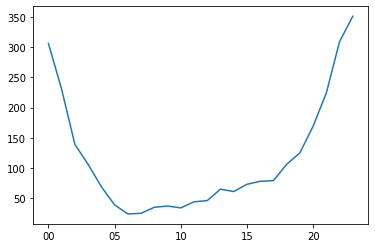

In [209]:
# df['hour'] = df.created_date.dt.strftime('%H')
df[df.complaint_type == 'Noise - Residential'].hour.value_counts().sort_index().plot()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

<AxesSubplot:xlabel='created_date'>

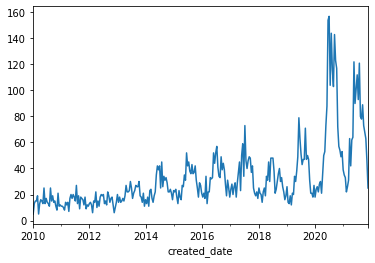

In [483]:
#see a small portion of it later
df_loud_music = df[df.descriptor == 'Loud Music/Party']
df_loud_music.resample('2W-SUN', on='created_date').size().plot()




### People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [234]:
df[df.complaint_type.str.contains('bee', case=False)]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month,hour
13281392,16742410,2010-05-27 07:49:40,2010-05-27 07:49:40,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Private Property,Commercial Building,11412,194-15 109 ROAD,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE,May,07
26144219,40308711,2018-09-17 13:04:47,2018-09-17 13:04:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10457,1839 BELMONT AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,September,13
17302169,28758039,2014-08-26 16:54:10,2014-08-26 16:54:10,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,11220,451 49 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,August,16


### What month do most of the complaints happen in? I'd like to see a graph.

In [235]:
df[df.complaint_type.str.contains('bee', case=False)].month.value_counts()

May          1
September    1
August       1
Name: month, dtype: int64

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [236]:
df[df.complaint_type.str.contains('bee', case=False)].descriptor.value_counts()

Bees/Wasps - Not a beekeper      2
Bees/Wasps - Private Property    1
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [271]:
df['created_hour'] = df.created_date.dt.strftime('%H').astype(float)
df['closed_hour'] = df.closed_date.dt.strftime('%H').astype(float)

In [487]:
df['time_to_fix'] = df.closed_date - df.created_date

df.time_to_fix.describe()




count                          97152
mean       3 days 17:50:58.237020339
std      692 days 01:38:35.644662992
min            -44376 days +03:14:45
25%           0 days 02:03:49.500000
50%                  1 days 03:54:00
75%                  7 days 00:00:00
max               3191 days 01:46:52
Name: time_to_fix, dtype: object

Save it as a new column called `time_to_fix`

In [ ]:
df['time_to_fix'] = df.closed_date - df.created_date

## Which agency has the best time-to-fix time?

In [280]:
#crazy data
df.groupby(by='agency').time_to_fix.mean().sort_values()

agency
DOHMH                                     -521 days +18:13:42.398333328
TLC                                       -120 days +04:06:39.055762082
HRA                                           0 days 00:00:45.040650406
3-1-1                                            0 days 00:01:01.320000
NYPD                                          0 days 07:06:16.452177975
DHS                                           2 days 07:12:45.290909090
DFTA                                             5 days 04:09:45.100000
MAYORâS OFFICE OF SPECIAL ENFORCEMENT       5 days 08:02:19.523809523
DEP                                           6 days 03:56:15.171154723
DOF                                           6 days 21:34:40.056363636
DSNY                                         10 days 16:48:09.696869851
DOT                                          12 days 01:06:34.412858661
HPD                                          12 days 11:52:02.847264228
NYCEM                                           14 days 0

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [281]:
#crazy data
df.groupby(by='agency').time_to_fix.describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,25,0 days 00:01:01.320000,0 days 00:01:30.533014236,0 days 00:00:04,0 days 00:00:17,0 days 00:00:29,0 days 00:00:53,0 days 00:06:06
DCA,271,23 days 18:15:14.284132841,75 days 18:11:12.784914541,0 days 00:21:18,1 days 05:49:43.500000,3 days 18:39:35,15 days 11:24:48.500000,517 days 10:23:03
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,2191,6 days 03:56:15.171154723,50 days 02:18:41.162670555,-488 days +22:34:00,0 days 02:11:30,0 days 21:54:00,4 days 02:39:00,1937 days 00:15:00
DFTA,110,5 days 04:09:45.100000,6 days 04:28:03.292360527,0 days 00:39:05,0 days 22:44:58.750000,3 days 03:27:04,7 days 02:11:10.500000,41 days 05:57:35
DHS,275,2 days 07:12:45.290909090,5 days 09:14:01.950662471,0 days 00:00:02,0 days 00:50:31,0 days 03:02:14,1 days 23:03:46,50 days 23:15:14
DOB,1451,76 days 02:20:51.097863543,190 days 01:16:52.030774400,0 days 00:00:00,1 days 07:04:44.500000,13 days 12:50:30,66 days 10:30:36,2457 days 09:30:32
DOE,25,46 days 06:17:52.880000,83 days 10:04:35.595393406,0 days 01:37:23,1 days 11:48:34,10 days 22:06:52,42 days 21:36:55,336 days 19:17:52


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [282]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
3-1-1,0 days 00:00:29,25
DCA,3 days 18:31:44,272
DCAS,NaT,3
DCP,NaT,1
DEP,0 days 21:29:00,2201
DFTA,3 days 03:27:04,110
DHS,0 days 03:01:43,276
DOB,13 days 12:29:09,1452
DOE,10 days 22:06:52,25


In [283]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix      
                                                         median  size
agency                                                               
3-1-1                                           0 days 00:00:29    25
DCA                                             3 days 18:31:44   272
DCAS                                                        NaT     3
DCP                                                         NaT     1
DEP                                             0 days 21:29:00  2201
DFTA                                            3 days 03:27:04   110
DHS                                             0 days 03:01:43   276
DOB                                            13 days 12:29:09  1452
DOE                                            10 days 22:06:52    25
DOF                                             2 days 12:44:08   553
DOHMH                                           4 days 00:00:00   775
DOITT                                          21 days 07:09:11    11
DOT                                             1 days 03:20:25  3818
DPR                                             3 days 16:31:15  1411
DSNY                                            1 days 23:23:00  2472
EDC                                             0 days 00:00:49    53
HPD                                             5 days 16:05:14  7438
HRA                                             0 days 00:00:32   123
MAYORâS OFFICE OF SPECIAL ENFORCEMENT  0 days 06:20:27.500000    84
NYCEM                                    6 days 12:00:25.500000    14
NYPD                                            0 days 01:44:52  8571
TLC                                     24 days 07:16:16.500000   312

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [297]:
df[df.agency == 'NYPD'].groupby(by='complaint_type').time_to_fix.mean()

complaint_type
Abandoned Vehicle             0 days 09:21:46.303921568
Animal Abuse                  0 days 06:45:04.186440677
Animal-Abuse                  0 days 02:46:02.526315789
Bike/Roller/Skate Chronic        0 days 01:46:21.200000
Blocked Driveway              0 days 04:22:12.869868319
Derelict Vehicle              1 days 04:50:22.319327731
Disorderly Youth                        0 days 04:25:07
Drinking                         0 days 02:16:03.200000
Drug Activity                 0 days 04:39:47.076923076
Encampment                       0 days 01:20:19.700000
Graffiti                         0 days 02:17:32.700000
Homeless Encampment           0 days 03:58:40.333333333
Homeless Street Condition     0 days 01:24:33.545454545
Illegal Fireworks             0 days 00:46:12.642857142
Illegal Parking               0 days 07:39:46.761593729
Noise - Commercial            0 days 02:41:06.589285714
Noise - House of Worship      0 days 02:58:40.923076923
Noise - Park                  0 d

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [317]:
#weird numbers because the closed_date is a crazy column that has dates like  1899
# i went to the original source and it is like that there too: see unique key 51936158 here https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data
# trying to fix this by filtering only those dates where closed date > created date
df = df[df.closed_date >= df.created_date]
df.groupby(by='borough').time_to_fix.mean()

borough
BRONX           11 days 19:32:17.076008176
BROOKLYN        15 days 03:33:41.382522671
MANHATTAN       12 days 18:51:01.238986014
QUEENS          18 days 19:59:36.611128142
STATEN ISLAND   10 days 23:04:59.923184357
Unspecified     10 days 10:51:16.705238467
Name: time_to_fix, dtype: timedelta64[ns]

In [315]:
# why are the numbers so crazy????
# df[df.borough == 'MANHATTAN'].sort_values(by='time_to_fix')
# the problem is in the closed_date column from the original source
df[(df.closed_date >= df.created_date) & (df.borough == 'MANHATTAN')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,created_hour,closed_hour,time_to_fix
24037876,37565312,2017-10-30 22:52:32,2017-10-30 23:19:57,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10032.0,1989 AMSTERDAM AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,22.0,23.0,0 days 00:27:25
3055379,22530404,2012-01-16 00:00:00,2012-01-23 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10026.0,160 WEST 116 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,UNKNOWN,0.0,0.0,7 days 00:00:00
12915809,27829160,2014-04-11 14:55:09,2014-04-11 15:01:50,DPR,Department of Parks and Recreation,Violation of Park Rules,Smoking,Park,10018,NaN,NaN,NEW YORK,Closed,MANHATTAN,PHONE,14.0,15.0,0 days 00:06:41
7488139,43876801,2019-09-23 19:09:44,2019-09-23 21:56:10,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10040,265 CABRINI BOULEVARD,NaN,NEW YORK,Closed,MANHATTAN,MOBILE,19.0,21.0,0 days 02:46:26
4633832,26780555,2013-11-29 00:00:00,2013-12-05 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10033.0,165 AUDUBON AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,0.0,0.0,6 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936850,45088889,2019-12-05 23:06:39,2019-12-07 11:31:00,TLC,Taxi and Limousine Commission,Lost Property,Bag/Wallet,NaN,10075.0,100 EAST 77 STREET,NaN,NEW YORK,Closed,MANHATTAN,PHONE,23.0,11.0,1 days 12:24:21
5091413,37452079,2017-10-17 01:08:53,2017-11-06 15:04:49,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10025,50 MANHATTAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,1.0,15.0,20 days 13:55:56
3716469,24331308,2012-11-04 00:00:00,2012-11-09 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10026,170 LENOX AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,ONLINE,0.0,0.0,5 days 00:00:00
7521176,50262197,2021-04-12 10:53:36,2021-04-14 09:07:39,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10031,620 WEST 141 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,ONLINE,10.0,9.0,1 days 22:14:03


### Or, use another technique!

# We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [320]:
df.pivot_table(
    index='borough',
    values='time_to_fix',
    aggfunc='mean'
)

,time_to_fix
borough,
BRONX,11 days 19:32:17.076008176
BROOKLYN,15 days 03:33:41.382522671
MANHATTAN,12 days 18:51:01.238986014
QUEENS,18 days 19:59:36.611128142
STATEN ISLAND,10 days 23:04:59.923184357
Unspecified,10 days 10:51:16.705238467


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [555]:
#bronx


bronx_borough = df[df.borough == 'BRONX']
staten_borough = df[df.borough == 'STATEN ISLAND']

bronx_borough.pivot_table(
    index=['borough', 'agency'],
    values='time_to_fix',
    aggfunc='mean'

).sort_values(by='time_to_fix', ascending=False).head(1)


,,time_to_fix
borough,agency,
BRONX,DPR,96 days 21:17:44.664615385


In [556]:
#staten island


bronx_borough = df[df.borough == 'BRONX']
staten_borough = df[df.borough == 'STATEN ISLAND']

staten_borough.pivot_table(
    index=['borough', 'agency'],
    values='time_to_fix',
    aggfunc='mean'

).sort_values(by='time_to_fix', ascending=False).head(1)


,,time_to_fix
borough,agency,
STATEN ISLAND,DOE,129 days 07:08:56


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [367]:
## important to remember here that im using just a sample

thanksgiving_df = df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')]

thanksgiving_df.complaint_type.value_counts()

Noise - Street/Sidewalk    3
Illegal Parking            3
UNSANITARY CONDITION       2
Illegal Fireworks          1
Noise                      1
Dirty Conditions           1
Vending                    1
Blocked Driveway           1
Damaged Tree               1
HEAT/HOT WATER             1
Noise - Residential        1
Noise - Commercial         1
Name: complaint_type, dtype: int64

In [368]:
thanksgiving_df = df[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')]

thanksgiving_df.complaint_type.value_counts()

Illegal Parking                      7
Consumer Complaint                   2
HEAT/HOT WATER                       2
Noise - Vehicle                      2
GENERAL                              2
Noise - Residential                  2
Abandoned Vehicle                    1
Missed Collection (All Materials)    1
Street Light Condition               1
APPLIANCE                            1
Boilers                              1
Name: complaint_type, dtype: int64

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [419]:
df['month_day'] = df['MM-DD'] = df['created_date'].dt.strftime('%m-%d')

df[df.month_day == '12-25']

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,month_day,MM-DD
20027254,32267352,2015-12-25 01:36:35,2015-12-25 02:23:47,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10465,CONNELL PLACE,BLOCKFACE,BRONX,Closed,BRONX,PHONE,12-25,12-25
8055837,48495134,2020-12-25 18:23:58,2020-12-25 19:01:53,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11416,86-19 95 AVENUE,NaN,OZONE PARK,Closed,QUEENS,ONLINE,12-25,12-25
26765490,41270210,2018-12-25 21:01:46,2018-12-25 21:08:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10472,1207 BEACH AVENUE,ADDRESS,BRONX,Closed,BRONX,MOBILE,12-25,12-25
17932922,29578120,2014-12-25 16:47:31,2014-12-25 23:15:38,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11232,465 42 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,MOBILE,12-25,12-25
26763080,41267433,2018-12-25 02:49:11,2018-12-25 04:59:45,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11377,34-33 64 STREET,ADDRESS,WOODSIDE,Closed,QUEENS,PHONE,12-25,12-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500060,22392623,2011-12-25 13:00:43,2011-12-25 14:20:27,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11421,89-13 92 STREET,ADDRESS,WOODHAVEN,Closed,QUEENS,PHONE,12-25,12-25
16245510,26984474,2013-12-25 05:04:46,2013-12-25 06:23:43,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10451,666 COURTLAND AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE,12-25,12-25
17931380,29576333,2014-12-25 02:48:55,2014-12-25 05:08:50,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11420,109-55 LEFFERTS BOULEVARD,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,ONLINE,12-25,12-25
8054562,48494067,2020-12-25 16:20:24,2020-12-25 17:00:13,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11214,146 28 AVENUE,NaN,BROOKLYN,Closed,BROOKLYN,MOBILE,12-25,12-25


# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [557]:
# I tried this df[df.complaint_type.str.contains('firework', case=False)].complaint_type.unique()
# and found out that there is only one complaint type related to firework, so I will use this one

#create a month / year column only
df['year'] = df['created_date'].dt.strftime('%Y')
df['month_day'] = df['created_date'].dt.strftime('%B')

#filter only 2020 results related to Illegal Fireworks as complaint_type
fireworks = df[(df.complaint_type == 'Illegal Fireworks') & (df.year == '2020')]

#counting 
# fireworks.month_day.value_counts().plot()

fireworks.month_day.value_counts()

# People may not be using 311 or maybe the complaints are being registered as noise or any other complaint_type
# maybe 311 changed the way these complaints were filled?
# but yes, there is a raise in 2020 during june and july

June         116
July          57
August         4
September      2
October        2
November       1
Name: month_day, dtype: int64

In [558]:
###COMPARING WITH 2019 

#create a month / year column only
df['year'] = df['created_date'].dt.strftime('%Y')
df['month_day'] = df['created_date'].dt.strftime('%B')

#filter only 2019 results related to Illegal Fireworks as complaint_type
fireworks2019 = df[(df.complaint_type == 'Illegal Fireworks') & (df.year == '2019')]

#counting 
# fireworks.month_day.value_counts().plot()

fireworks2019.month_day.value_counts()

July    2
June    1
Name: month_day, dtype: int64

In [560]:
#COMPARING WITH 2018
#create a month / year column only
df['year'] = df['created_date'].dt.strftime('%Y')
df['month_day'] = df['created_date'].dt.strftime('%B')

#filter only 2019 results related to Illegal Fireworks as complaint_type
fireworks2018 = df[(df.complaint_type == 'Illegal Fireworks') & (df.year == '2018')]

#counting 
# fireworks.month_day.value_counts().plot()

fireworks2018.month_day.value_counts()

July        1
December    1
Name: month_day, dtype: int64

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

<AxesSubplot:xlabel='created_date'>

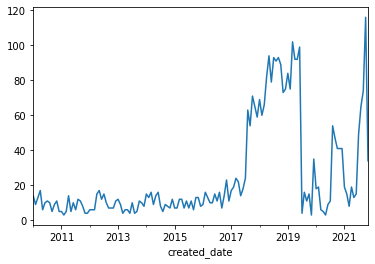

In [566]:
####complaint peaks per year#####


#Filter Department of Sanitation
sanitation = df[df.agency_name == 'Department of Sanitation']

# Sanitation complaints count by month from 2010 to 2021 and plot
sanitation.resample('M', on='created_date').size().plot()

#for sure there was a rise in these complaints in 2021 and it was the highest number since 2011

# What assumptions is your analysis making? What could make your analysis fall apart?
# When it comes to 311 we will never know if the complaints are always filled in the same way and whether they 
# were forwarded to the same agency, so the data could be incomplete.

In [579]:
#### 2021 slowdown
## im not sure if this works because "city" is awful
### i didn't find the neighborhoods that you mentioned

sanitation2021 = df[(df.year == '2021') & (df.agency_name == 'Department of Sanitation')]

sanitation2021.city.value_counts()

BROOKLYN               139
STATEN ISLAND           52
NEW YORK                46
BRONX                   37
Jamaica                 12
Astoria                  7
ASTORIA                  5
FLUSHING                 5
Maspeth                  5
Flushing                 5
South Ozone Park         4
Woodside                 4
Elmhurst                 4
Corona                   4
Ozone Park               3
OZONE PARK               3
RIDGEWOOD                3
Ridgewood                3
COLLEGE POINT            3
Long Island City         2
Floral Park              2
JAMAICA                  2
College Point            2
Middle Village           2
HOLLIS                   2
Oakland Gardens          2
RICHMOND HILL            2
Fresh Meadows            2
SOUTH RICHMOND HILL      2
Jackson Heights          2
Hollis                   2
Arverne                  2
QUEENS VILLAGE           1
WOODSIDE                 1
BAYSIDE                  1
SPRINGFIELD GARDENS      1
Bayside                  1
H

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

In [614]:
pd.set_option('display.max_rows', 1000)

df.pivot_table(
    columns='year',
    index='incident_zip',
    values='borough',
    aggfunc='count'
)


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
incident_zip,,,,,,,,,,,,
7621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
10001.0,3.0,5.0,7.0,6.0,2.0,11.0,7.0,12.0,13.0,26.0,28.0,22.0
10002.0,12.0,13.0,8.0,14.0,8.0,9.0,13.0,23.0,16.0,39.0,42.0,55.0
10003.0,12.0,11.0,5.0,9.0,5.0,10.0,17.0,20.0,27.0,46.0,43.0,41.0
10004.0,NaN,2.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,5.0,3.0,2.0
10005.0,NaN,2.0,NaN,NaN,1.0,1.0,6.0,6.0,2.0,2.0,3.0,2.0
10006.0,1.0,1.0,1.0,NaN,NaN,2.0,2.0,2.0,1.0,4.0,4.0,2.0
10007.0,NaN,5.0,NaN,1.0,2.0,3.0,3.0,3.0,2.0,14.0,11.0,5.0


## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

<AxesSubplot:xlabel='created_date'>

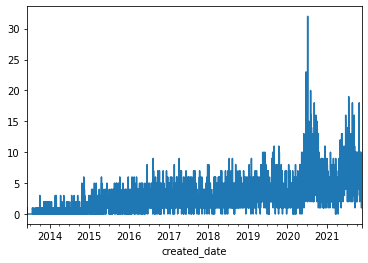

In [635]:
#im not sure about how to do this but i would have to find the days with zero complaints in a specific year, both for mobile and phone

df_mobile = df[df.open_data_channel_type == 'MOBILE']

df_mobile.resample('D', on='created_date').size().plot()



In [637]:
df_mobile.created_date.value_counts()

2016-06-27 00:00:00    3
2015-04-16 00:00:00    2
2019-02-28 12:00:00    2
2015-02-16 12:00:00    2
2015-02-25 00:00:00    2
                      ..
2020-07-08 08:33:08    1
2021-01-01 06:35:54    1
2018-10-01 22:15:40    1
2019-03-27 00:45:27    1
2018-01-30 17:42:27    1
Name: created_date, Length: 9008, dtype: int64

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)

In [620]:
#i can't find NYCHA on this list
df.agency_name.unique()

array(['Department of Health and Mental Hygiene',
       'New York City Police Department',
       'Department of Housing Preservation and Development',
       'Correspondence Unit', 'Department of Buildings',
       'Department of Transportation', 'Property Exec Office',
       'A - Queens', 'Manhattan 02', 'Land Records', 'A - Brooklyn',
       'Department of Environmental Protection',
       'A - Canine Task Force Citywide', 'BCC - Brooklyn North',
       'Mayorâ\x80\x99s Office of Special Enforcement', 'Queens East 10',
       'Department of Parks and Recreation', 'Department of Sanitation',
       'Department of Consumer Affairs',
       'Economic Development Corporation', 'Refunds and Adjustments',
       'HRA Benefit Card Replacement', 'BCC - Queens East',
       'Taxi and Limousine Commission',
       'A - Illegal Posting Staten Island, Queens and Brooklyn',
       'Senior Citizen Rent Increase Exemption Unit',
       'DOB Inspections - Queens', 'Department of Homeless Services